In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import monai
from PIL import Image
import torch
from monai.visualize import blend_images, matshow3d, plot_2d_or_3d_image


In [ ]:
# Cursor parking space

In [ ]:
import os
os.environ["WANDB_NOTEBOOK_NAME"] = "./project.ipynb"

import wandb
wandb.login()

True

In [ ]:
patient_folders = os.listdir("data/training")
patient_folders = [x for x in patient_folders if '.' not in x]
images = [{'img': "data/training/" + x + "/" + x + "_4d.nii.gz"} for x in patient_folders]

print(patient_folders)

['patient029', 'patient002', 'patient074', 'patient088', 'patient031', 'patient024', 'patient020', 'patient097', 'patient021', 'patient075', 'patient022', 'patient064', 'patient060', 'patient072', 'patient084', 'patient046', 'patient043', 'patient062', 'patient089', 'patient076', 'patient041', 'patient051', 'patient012', 'patient059', 'patient067', 'patient077', 'patient100', 'patient058', 'patient040', 'patient007', 'patient092', 'patient006', 'patient001', 'patient095', 'patient010', 'patient066', 'patient013', 'patient003', 'patient045', 'patient036', 'patient050', 'patient093', 'patient098', 'patient033', 'patient015', 'patient044', 'patient094', 'patient034', 'patient054', 'patient096', 'patient014', 'patient009', 'patient017', 'patient035', 'patient071', 'patient070', 'patient032', 'patient065', 'patient030', 'patient078', 'patient063', 'patient049', 'patient025', 'patient079', 'patient090', 'patient026', 'patient008', 'patient011', 'patient005', 'patient087', 'patient099', 'pati

In [ ]:
from eval import load_nii
class LoadNIFTI(monai.transforms.Transform):
    """
    This custom Monai transform loads the data from the rib segmentation dataset.
    Defining a custom transform is simple; just overwrite the __init__ function and __call__ function.
    """
    def __init__(self, keys=None):
        pass

    def __call__(self, sample):
        image, img_affine, img_header = load_nii(sample['img'])
        image = np.moveaxis(image, (0, 1, 2, 3), (2, 3, 0, 1))
        mask = image
        # return {'img': image, 'mask': mask, 'img_meta_dict': {'affine': img_affine, 'header': img_header}, 
        #         'mask_meta_dict': {}}
        return {'img': image, 'mask': mask}

In [ ]:
# Define transforms for loading the dataset

# add_channels_transform = monai.transforms.AddChanneld(keys=['img', 'mask'])
# flip_transform = monai.transforms.RandFlipd(keys=['img', 'mask'], prob=1, spatial_axis=1)
# rotate_transform = monai.transforms.RandRotated(keys=['img', 'mask'], range_x=np.pi/4, prob=1, mode=['bilinear', 'nearest'])

In [ ]:
train_dict_list = [x for x in images]
dataset = monai.data.CacheDataset(train_dict_list, transform=LoadNIFTI())


Loading dataset: 100%|████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.96it/s]


In [ ]:
data_loader = monai.data.DataLoader(dataset, batch_size=1)

torch.Size([1, 11, 30, 256, 192])


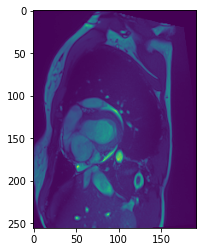

In [ ]:
# Visualize something
for data in data_loader:
    print(np.shape(data['img']))
    plt.imshow(data['img'][0][0][29])
    break